In [1]:
import plotly.graph_objs as go
import plotly.io as pio
import plotly.express as px
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt

# Importing Plotly
import plotly.offline as py
py.init_notebook_mode(connected=True)

# Initializing Plotly
pio.renderers.default = 'colab'

In [2]:
dataset1 = pd.read_csv("covid.csv") 
dataset1.head()

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region,iso_alpha
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas,USA
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas,BRA
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia,IND
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe,RUS
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa,ZAF


In [3]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country/Region    209 non-null    object 
 1   Continent         208 non-null    object 
 2   Population        208 non-null    float64
 3   TotalCases        209 non-null    int64  
 4   NewCases          4 non-null      float64
 5   TotalDeaths       188 non-null    float64
 6   NewDeaths         3 non-null      float64
 7   TotalRecovered    205 non-null    float64
 8   NewRecovered      3 non-null      float64
 9   ActiveCases       205 non-null    float64
 10  Serious,Critical  122 non-null    float64
 11  Tot Cases/1M pop  208 non-null    float64
 12  Deaths/1M pop     187 non-null    float64
 13  TotalTests        191 non-null    float64
 14  Tests/1M pop      191 non-null    float64
 15  WHO Region        184 non-null    object 
 16  iso_alpha         209 non-null    object 
dt

In [4]:
dataset2 = pd.read_csv("covid_grouped.csv")
dataset2.head()  # return first 5 rows of dataset2

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region,iso_alpha
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean,AFG
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe,ALB
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa,DZA
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe,AND
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa,AGO


In [5]:
dataset1.columns

Index(['Country/Region', 'Continent', 'Population', 'TotalCases', 'NewCases',
       'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered',
       'ActiveCases', 'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop',
       'TotalTests', 'Tests/1M pop', 'WHO Region', 'iso_alpha'],
      dtype='object')

In [6]:
# Drop NewCases, NewDeaths, NewRecovered rows from dataset1

dataset1.drop(['NewCases', 'NewDeaths', 'NewRecovered'], 
              axis=1, inplace=True)

# Select random set of values from dataset1
dataset1.sample(5)

,Country/Region,Continent,Population,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region,iso_alpha
135,Uruguay,South America,3474956.0,1318,37.0,1079.0,202.0,2.0,379.0,11.0,126956.0,36535.0,Americas,URY
24,Qatar,Asia,2807805.0,112092,178.0,108831.0,3083.0,77.0,39922.0,63.0,511000.0,181993.0,EasternMediterranean,QAT
89,Finland,Europe,5541604.0,7532,331.0,6980.0,221.0,NaN,1359.0,60.0,389500.0,70287.0,Europe,FIN
207,Vatican City,Europe,801.0,12,NaN,12.0,0.0,NaN,14981.0,NaN,NaN,NaN,Europe,VAT
168,Mongolia,Asia,3283344.0,293,NaN,260.0,33.0,1.0,89.0,NaN,38334.0,11675.0,WesternPacific,MNG


In [7]:
from plotly.figure_factory import create_table 
colorscale = [[0, '#4d004c'], [.5, '#f2e5ff'], [1, '#ffffff']]
table = create_table(dataset1.head(15), colorscale=colorscale)
py.iplot(table)

In [8]:
px.bar(dataset1.head(15),x='Country/Region',y='TotalCases',color="TotalCases",height=500,hover_data=['Country/Region','Continent'])

In [9]:
px.bar(dataset1.head(15), x = 'Country/Region', y = 'TotalCases',
       color = 'TotalDeaths', height = 500,
       hover_data = ['Country/Region', 'Continent'])

In [10]:
px.bar(dataset1.head(15), x = 'Country/Region', y = 'TotalCases',
       color = 'TotalDeaths', height = 500,
       hover_data = ['Country/Region', 'Continent'])

In [11]:
px.scatter(dataset1, x='Continent',y='TotalCases', 
           hover_data=['Country/Region', 'Continent'], 
           color='TotalCases', size='TotalCases', size_max=80)

In [12]:
px.scatter(dataset1.head(57), x='Continent',y='TotalCases', 
           hover_data=['Country/Region', 'Continent'], 
           color='TotalCases', size='TotalCases', size_max=80, log_y=True)

In [13]:
px.choropleth(dataset2,
              locations="iso_alpha",
              color="Confirmed",
              hover_name="Country/Region", 
              color_continuous_scale="Blues",
              animation_frame="Date")

In [14]:
px.choropleth(dataset2,
              locations='iso_alpha',
              color="Deaths",
              hover_name="Country/Region",
              color_continuous_scale="Viridis",
              animation_frame="Date" )

In [15]:
dataset3= pd.read_csv("coviddeath.csv")
dataset3.head()

,Data as of,Start Week,End Week,State,Condition Group,Condition,ICD10_codes,Age Group,Number of COVID-19 Deaths,Flag
0,08/30/2020,02/01/2020,08/29/2020,US,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,122.0,NaN
1,08/30/2020,02/01/2020,08/29/2020,US,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,596.0,NaN
2,08/30/2020,02/01/2020,08/29/2020,US,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,1521.0,NaN
3,08/30/2020,02/01/2020,08/29/2020,US,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,4186.0,NaN
4,08/30/2020,02/01/2020,08/29/2020,US,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,10014.0,NaN


In [16]:
dataset3.groupby(["Condition"]).count()

,Data as of,Start Week,End Week,State,Condition Group,ICD10_codes,Age Group,Number of COVID-19 Deaths,Flag
Condition,,,,,,,,,
Adult respiratory distress syndrome,540,540,540,540,540,540,540,272,268
All other conditions and causes (residual),540,540,540,540,540,540,540,363,177
Alzheimer disease,530,530,530,530,530,530,530,144,386
COVID-19,540,540,540,540,540,540,540,377,163
Cardiac arrest,520,520,520,520,520,520,520,219,301
Cardiac arrhythmia,540,540,540,540,540,540,540,192,348
Cerebrovascular diseases,530,530,530,530,530,530,530,187,343
Chronic lower respiratory diseases,540,540,540,540,540,540,540,229,311
Diabetes,540,540,540,540,540,540,540,276,264


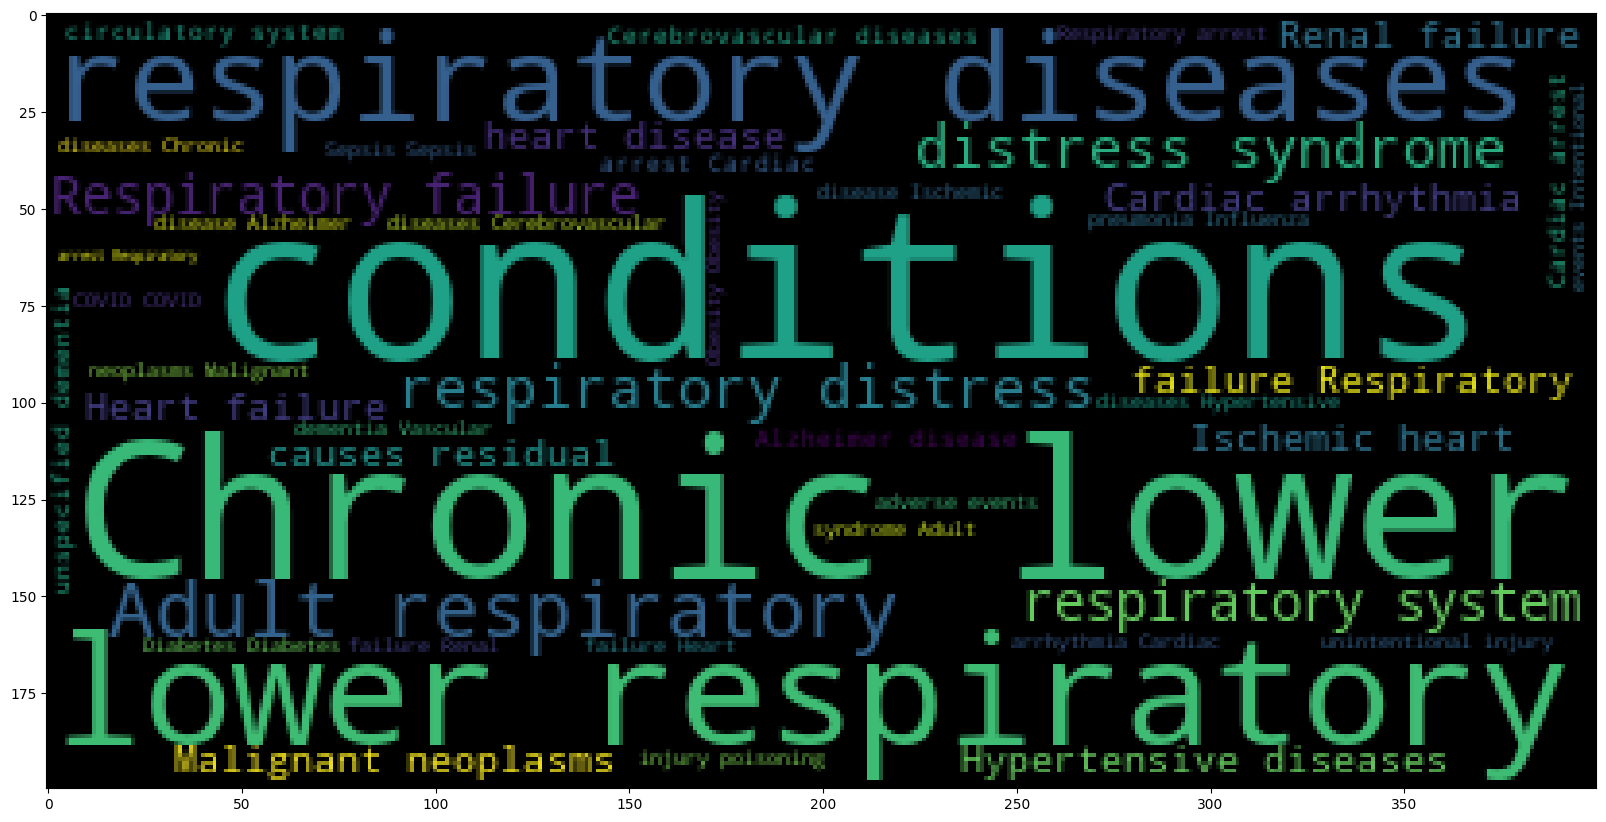

In [18]:
# import word cloud
from wordcloud import WordCloud

sentences = dataset3["Condition"].tolist()
sentences_as_a_string = ' '.join(sentences)


# Convert the string into WordCloud
plt.figure(figsize=(20, 20))
plt.imshow(WordCloud().generate(sentences_as_a_string))

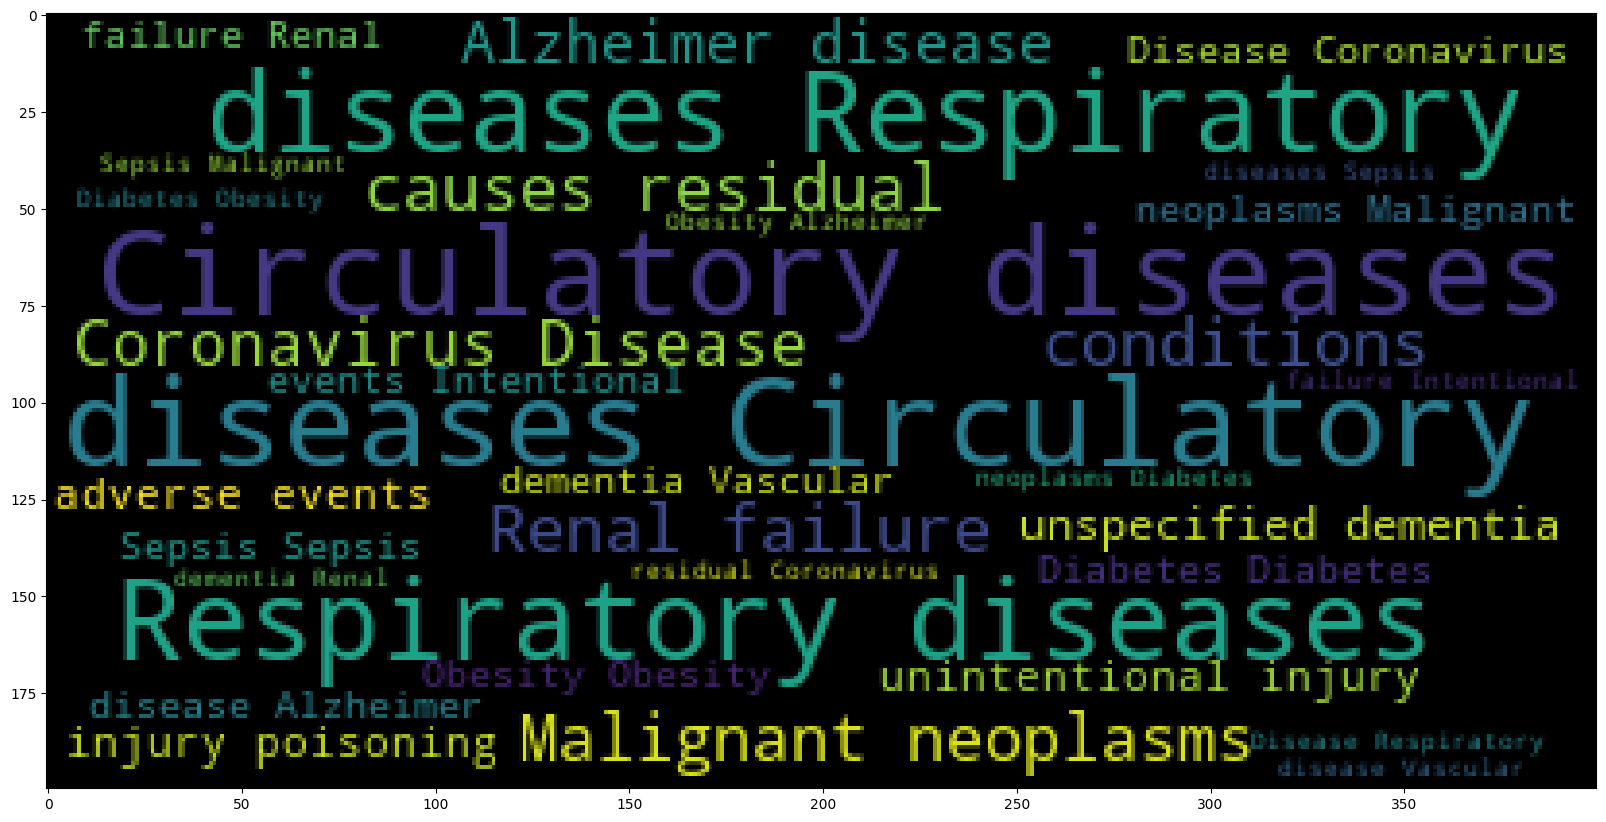

In [19]:
column2_tolist= dataset3["Condition Group"].tolist()

# Convert the list to one single string
column_to_string= " ".join(column2_tolist)

# Convert the string into WordCloud
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(column_to_string))